In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 120

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, classification_report


# make parent kaggle folder importable
import sys
import os
sys.path.append(os.path.abspath("../"))
import importlib
import utils as u
import graphs as g
import processing as p
import extraction as e
import selection as s
import model as m
import datasource as ds

Using TensorFlow backend.


# Data

In [2]:
importlib.reload(ds)

train_data = ds.load_train_data()
train_data.info()

Loading train data... *  
Inputing data... *  
DONE train data. *  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [3]:
importlib.reload(ds)

test_data = ds.load_test_data()
test_data.info()

Loading test data... *  
Inputing data... *  
DONE test data. *  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 3 columns):
test_id      int64
question1    object
question2    object
dtypes: int64(1), object(2)
memory usage: 53.7+ MB


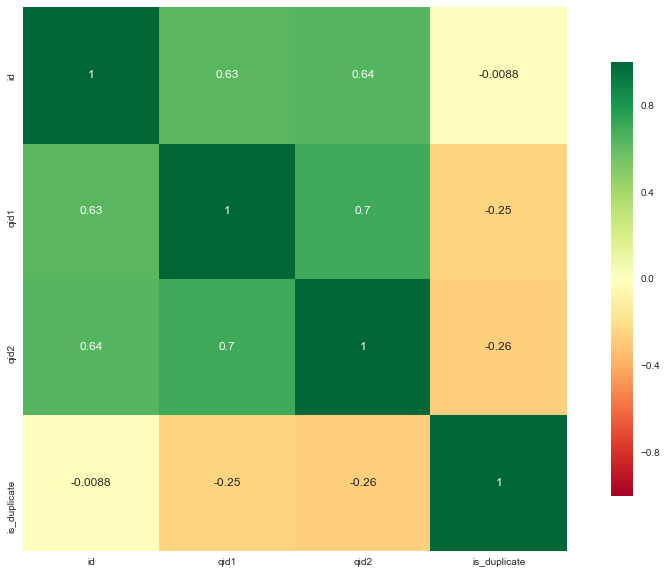

In [4]:
# train_data.describe()
g.plot_correlation_map(train_data)

# Sample extraction

In [ ]:
import itertools

d = train_data[train_data.qid1==8461]
print(q.shape)

ids = list(itertools.combinations(d.qid2, 2))[0]
print(ids)

m = pd.concat([train_data, q], axis=0, ignore_index=True, verify_integrity=True, join='inner')
u.log('t', train_data.shape)
u.log('m', m.shape)

# u.log('cs', len(cs))

# train_data[['qid1']].groupby(['qid1']).size()

# Feature extraction

In [5]:
importlib.reload(ds)
ds.load_questions(train_data)

Loading q1... *  
Loading q2... *  


In [44]:
importlib.reload(ds)
ds.load_words(train_data)
ds.load_stops(train_data)
ds.load_ratios(train_data)
ds.load_shared_words(train_data)

Loading words and counts... *  
Loading stops and counts... *  
Loading stops/words ratio... *  
Loading shared words and counts... *  


In [46]:
importlib.reload(ds)
ds.load_similar(train_data)

Loading similar... *  


In [47]:
importlib.reload(ds)
ds.load_chars(train_data)

Loading chars... *  


In [60]:
importlib.reload(ds)
qs = ds.questions(train_data)
ds.load_freqs(train_data, qs)

Loading freqs... *  


In [49]:
importlib.reload(ds)
ds.load_bigrams(train_data)

Loading bigrams... *  


In [50]:
importlib.reload(ds)
ds.load_trigrams(train_data)

Loading trigrams... *  


In [21]:
importlib.reload(p)

tr, te = ds.load_data()
qe, features, stops = ds.questions_encoder(tr, te, max_features=1000)

corpus features * 1000 
corpus stops * 120139 


In [ ]:
# n-grams
importlib.reload(ds)

# ds.load_unigrams(train_data)
# ds.load_bigrams(train_data)
# ds.load_trigrams(train_data)
# ds.load_stops(train_data)

# ds.load_unigrams(test_data)
# ds.load_bigrams(test_data)
# ds.load_trigrams(test_data)
# ds.load_stops(test_data)

In [22]:
x_q1 = e.extract(train_data, 'question1', qe)
x_q2 = e.extract(train_data, 'question2', qe)

# x_q1_test = e.extract(test_data, 'question1', question_we)
# x_q2_test = e.extract(test_data, 'question2', question_we)

# x_q2.describe()

E question1 * (404290, 1000) 
E question2 * (404290, 1000) 


In [23]:
# tf-idf score

importlib.reload(ds)

# def tfidf(row):
#    tf1 = x_q1.iloc[row.id].sum()
#    tf2 = x_q2.iloc[row.id].sum()
#    return tf1 + tf2

# train_data['tfidf'] = train_data.apply(tfidf, axis=1, raw=True)
# test_data['tfidf'] = x_q1_test.sum(axis=1) + x_q2_test.sum(axis=1)

# ds.load_tfidf_data(train_data, encoder)

E question1 * (404290, 500) 
E question2 * (404290, 500) 


/Users/icostan/Work/kaggle/quora-pairs/datasource.py:108: RuntimeWarning: invalid value encountered in double_scalars
  return tf1 / (tf1 + tf2)


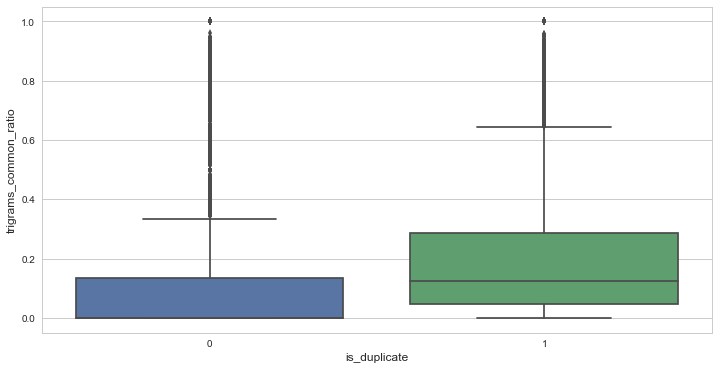

In [186]:
g.boxplot(train_data, 'is_duplicate', 'trigrams_common_ratio')

In [42]:
# stacked models

# is_duplicate_keras = model.predict(X)
train_data['is_duplicate_keras'] = is_duplicate_keras

In [87]:
# magic feature 2
from collections import defaultdict

questions = pd.concat([train_data[['question1', 'question2']], test_data[['question1', 'question2']]], axis=0).reset_index(drop='index')
print(questions.shape)

q_dict = defaultdict(set)
for i in range(questions.shape[0]):
        q_dict[questions.question1[i]].add(questions.question2[i])
        q_dict[questions.question2[i]].add(questions.question1[i])
        
def q1_q2_intersect(row):
    return(len(set(q_dict[row['question1']]).intersection(set(q_dict[row['question2']]))))

train_data['q1_q2_intersect'] = train_data.apply(q1_q2_intersect, axis=1, raw=True)

(2750086, 2)


,id,qid1,qid2,question1,question2,is_duplicate,q1,q2,is_duplicate_keras,words1,...,bigrams_ques2,bigrams_common_count,bigrams_common_ratio,trigrams_ques1,trigrams_ques2,trigrams_common_count,trigrams_common_ratio,freqs1,freqs2,q1_q2_intersect
31942,31942,58848,58849,Can depression be cause from thinking people h...,If you've been depressed your whole life is it...,0,"{thinking, life, to, whole, from, cause, depre...","{that, life, will, whole, likely, been, have, ...",0.254080,"{thinking, life, whole, depression, cause, peo...",...,"[(that, life), (life, will), (will, whole), (w...",1,0.038462,"[(thinking, life, to), (life, to, whole), (to,...","[(that, life, will), (life, will, whole), (wil...",0,0.038462,1,2,0
310702,310702,71195,434862,How do I can whole tomatoes?,Is it safe to eat tomato seeds?,0,"{tomatoes, whole, how, do, can, i}","{eat, to, safe, it, tomato, is, seeds}",0.370814,"{whole, tomatoes}",...,"[(eat, to), (to, safe), (safe, it), (it, tomat...",0,0.000000,"[(tomatoes, whole, how), (whole, how, do), (ho...","[(eat, to, safe), (to, safe, it), (safe, it, t...",0,0.000000,17,1,0
232192,232192,278910,217669,Who was luckiest person ever?,Who is luckiest man on earth?,1,"{who, ever, was, luckiest, person}","{who, man, on, luckiest, earth, is}",0.370814,"{person, ever, luckiest}",...,"[(who, man), (man, on), (on, luckiest), (lucki...",0,0.000000,"[(who, ever, was), (ever, was, luckiest), (was...","[(who, man, on), (man, on, luckiest), (on, luc...",0,0.000000,4,4,4
92157,92157,154325,154326,Can we reverse global warming?,What are some technologies that can reverse gl...,1,"{warming, global, reverse, can, we}","{are, that, warming, global, what, reverse, te...",0.370814,"{reverse, global, warming}",...,"[(are, that), (that, warming), (warming, globa...",1,0.090909,"[(warming, global, reverse), (global, reverse,...","[(are, that, warming), (that, warming, global)...",0,0.090909,3,2,2
120532,120532,84335,195482,How do I block/password protect content from m...,Can the data be retrieved from hard disk?,0,"{protect, being, my, deleted, how, from, do, c...","{the, data, retrieved, from, hard, disk, can, be}",0.444239,"{protect, deleted, content, blockpassword, har...",...,"[(the, data), (data, retrieved), (retrieved, f...",1,0.050000,"[(protect, being, my), (being, my, deleted), (...","[(the, data, retrieved), (data, retrieved, fro...",0,0.050000,2,1,0


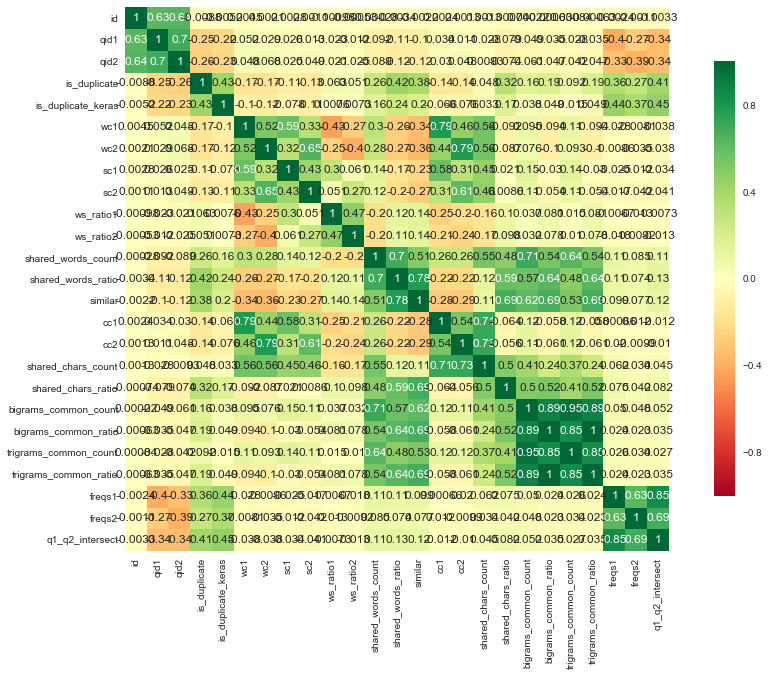

In [88]:
importlib.reload(g)
g.plot_correlation_map(train_data)
train_data.sample(5)
# train_data.iloc[9581]

# Feature selection

In [10]:
labels = ['0', '1']

y = train_data.is_duplicate
# print(y.value_counts())
Y = p.onehot(y)

Y * (404290, 2) 


In [89]:
importlib.reload(p)

# pf1 = s.percentile_filter(x_q1, y, percentile=10)
# pf2 = s.percentile_filter(x_q2, y, percentile=10)

x0 = train_data[['shared_words_ratio', 'similar', 'shared_chars_ratio', 'bigrams_common_ratio', 'trigrams_common_ratio', 'is_duplicate_keras']]
# x1 = s.select(x_q1, pf1, features)
# x2 = s.select(x_q2, pf2, features)
x3, scaler = p.scale(train_data[['wc1', 'wc2', 'sc1', 'sc2', 'cc1', 'cc2', 'shared_words_count', 'bigrams_common_count', 'trigrams_common_count', 'freqs1', 'freqs2', 'q1_q2_intersect']])

x = pd.DataFrame(index=train_data.index)
x = pd.merge(x, x0, left_index=True, right_index=True)
# x = pd.merge(x, x1, left_index=True, right_index=True)
# x = pd.merge(x, x2, left_index=True, right_index=True)
x = pd.merge(x, x3, left_index=True, right_index=True)

X = x.values
u.log('X train', X.shape)

# x0_test = test_data[['shared_words', 'shared_chars', 'similar', 'unigrams_common_ratio', 'bigrams_common_ratio', 'trigrams_common_ratio', 'stops_ratio']]
# x1_test = s.select(x_q1_test, pf1, question_features)
# x2_test = s.select(x_q2_test, pf2, question_features)
# x3_test, scaler = p.scale(test_data[['count', 'freqs1', 'freqs2']])

# x_test = pd.DataFrame(index=test_data.index)
# x_test = pd.merge(x_test, x0_test, left_index=True, right_index=True)
# x_test = pd.merge(x_test, x1_test, left_index=True, right_index=True)
# x_test = pd.merge(x_test, x2_test, left_index=True, right_index=True)
# x_test = pd.merge(x_test, x3_test, left_index=True, right_index=True)

# X_test = x_test.values
# u.log('X test', X_test.shape)

X train * (404290, 18) 


In [90]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

u.log('X train', X_train.shape)
u.log('y train', y_train.shape)
Y_train = p.onehot(y_train, title='Y train')

u.log('X val', X_val.shape)
u.log('y val', y_val.shape)
Y_val = p.onehot(y_val, title='Y val')

X train * (303217, 18) 
y train * (303217,) 
Y train * (303217, 2) 
X val * (101073, 18) 
y val * (101073,) 
Y val * (101073, 2) 


In [34]:
x.describe()

,1000_x,2000_x,2016_x,2017_x,500_x,alcohol_x,answers_x,ask_x,ban_x,banning_x,...,using_y,want,war_y,way_y,ways_y,weight_y,win_y,word_y,work_y,years
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,...,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,0.008657,0.002473,0.009760,0.004301,0.008870,0.001964,0.002904,0.005343,0.002276,0.002196,...,0.007670,0.012306,0.006765,0.023540,0.009075,0.008375,0.005511,0.004479,0.014297,0.007124
std,0.092640,0.049673,0.098311,0.065444,0.093761,0.044273,0.053809,0.072898,0.047649,0.046815,...,0.087243,0.110246,0.081971,0.151611,0.094831,0.091132,0.074031,0.066779,0.118711,0.084100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model

## Keras

In [92]:
importlib.reload(m)
from keras import optimizers as o
from sklearn.utils import class_weight

cw = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

model = m.keras_single_classification(X.shape[1])
model.compile(loss='binary_crossentropy', optimizer=o.RMSprop(lr=1e-2), metrics=['accuracy'], class_weight=cw)
history = model.fit(X_train, y_train, batch_size=10000, epochs=10)

result = model.evaluate(X_val, y_val, verbose=1)
print('')
u.log(model.metrics_names, result)

# plt.figure(figsize=(12,8))
# g.plot_accuracy(history)
# g.plot_loss(history)

/Users/icostan/Work/kaggle/ENV/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/10
303217/303217 [==============================] - 0s - loss: 0.5312 - acc: 0.7276      
Epoch 2/10
303217/303217 [==============================] - 0s - loss: 0.4556 - acc: 0.7631     

# XGB

[0]	validation_0-logloss:0.641506	validation_1-logloss:0.641663
[1]	validation_0-logloss:0.599118	validation_1-logloss:0.599403
[2]	validation_0-logloss:0.563684	validation_1-logloss:0.564076
[3]	validation_0-logloss:0.533809	validation_1-logloss:0.534355
[4]	validation_0-logloss:0.508418	validation_1-logloss:0.509082
[5]	validation_0-logloss:0.486412	validation_1-logloss:0.487156
[6]	validation_0-logloss:0.467634	validation_1-logloss:0.468467
[7]	validation_0-logloss:0.451105	validation_1-logloss:0.452018
[8]	validation_0-logloss:0.436759	validation_1-logloss:0.437741
[9]	validation_0-logloss:0.42419	validation_1-logloss:0.425264
[10]	validation_0-logloss:0.413243	validation_1-logloss:0.414414
[11]	validation_0-logloss:0.403658	validation_1-logloss:0.404904
[12]	validation_0-logloss:0.39491	validation_1-logloss:0.396194
[13]	validation_0-logloss:0.387221	validation_1-logloss:0.388548
[14]	validation_0-logloss:0.380286	validation_1-logloss:0.381677
[15]	validation_0-logloss:0.374267	va

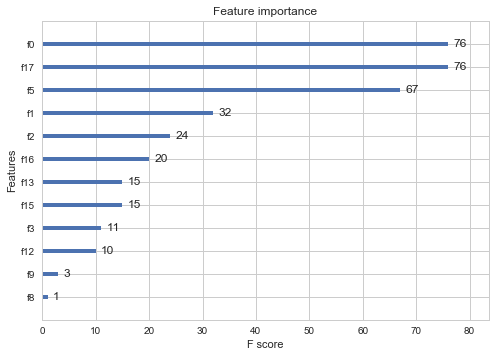

In [91]:
import xgboost as xgb
import operator

xgbc = xgb.XGBClassifier(learning_rate=0.1, n_estimators=50, silent=False)
xgbc.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric='logloss', verbose=True)

print(x.columns)
xgb.plot_importance(xgbc)

## Scikit

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# clf = KNeighborsClassifier()
# clf = SGDClassifier(verbose=1)
# clf = MultinomialNB()

# clf = RandomForestClassifier(n_estimators=10, class_weight='balanced', verbose=1)
# clf = GradientBoostingClassifier(n_estimators=10, random_state=6, verbose=1)
# clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5, verbose=1)


clf.fit(X_train, y_train)
score = clf.score(X_val, y_val)
u.log('Score', score)

# Cross validation

Logloss * 0.311718155215 
R *              precision    recall  f1-score   support

          0       0.85      0.93      0.89     63989
          1       0.86      0.72      0.79     37084

avg / total       0.86      0.86      0.85    101073
 
Confusion matrix, without normalization
[[59759  4230]
 [10215 26869]]


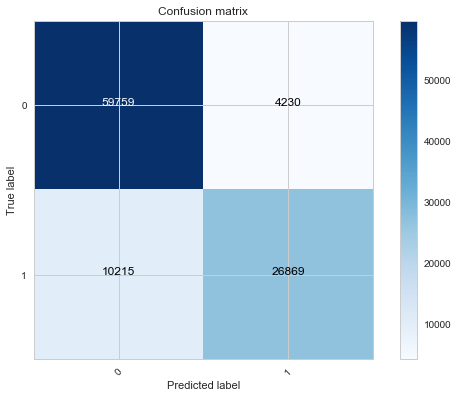

In [93]:
# y_val_prob = np.random.rand(y_val.shape[0])
# y_val_prob = model.predict(X_val)
y_val_prob = xgbc.predict_proba(X_val)[:, 1]
# y_val_prob = clf.predict_proba(X_val)

y_val_pred = (y_val_prob >= 0.5).astype('int32')

u.log('Logloss', log_loss(y_val, y_val_prob))
u.log('R', classification_report(y_val, y_val_pred, target_names=labels))

cm = confusion_matrix(y_val, y_val_pred)
g.plot_confusion_matrix(cm, labels)

# Prediction

In [112]:
# YY = keras.predict(X_test)
# YY = clf.predict_proba(X_test)
YY = xgbc.predict_proba(X_test)[:, 1]

print(YY.shape)
print(YY[:10])

(2345796,)
[ 0.03080662  0.29134125  0.35970497  0.0233999   0.38340589  0.04134487
  0.67454368  0.28713065  0.46619663  0.04527337]


# Submission

In [115]:
import time

sample = pd.read_csv('input/sample_submission.csv')
print(sample.shape)

submission = pd.DataFrame(columns=['test_id', 'is_duplicate'])
submission.test_id = sample.test_id
submission.is_duplicate = YY
submission.info()

filename = 'submission-' + time.strftime("%Y%m%d%H%M", time.gmtime()) + '.csv'
submission.to_csv(filename, index=False)

(2345796, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 2 columns):
test_id         int64
is_duplicate    float32
dtypes: float32(1), int64(1)
memory usage: 26.8 MB


# References

* https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb
* https://www.kaggle.com/philschmidt/quora-eda-model-selection-roc-pr-plots
* https://www.kaggle.com/jturkewitz/magic-features-0-03-gain
* https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
* https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-quora-ques-pair
* https://www.kaggle.com/sudalairajkumar/keras-starter-script-with-word-embeddings
* https://www.kaggle.com/alijs1/xgb-starter-12357
* https://www.kaggle.com/life2short/data-processing-replace-abbreviation-of-word
* https://www.kaggle.com/currie32/the-importance-of-cleaning-text
* https://www.kaggle.com/lystdo/lb-0-18-lstm-with-glove-and-magic-features
* https://www.kaggle.com/tour1st/magic-feature-v2-0-045-gain